In [1]:
# loading the required libraries
import os
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import statsmodels.formula.api as smf # linear regression --> Rsquared
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
random_state =  0
import re

In [2]:
df = pd.read_csv('w3af.txt')

In [3]:
df.head()

,"192.168.4.163 - - [22/Dec/2016:22:32:31 +0300] GET / HTTP/1.1"" 200 3279 ""-"" ""w3af.org"""""
0,192.168.4.163 - - [22/Dec/2016:22:32:31 +0300]...
1,192.168.4.163 - - [22/Dec/2016:22:32:31 +0300]...
2,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...
3,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...
4,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...


In [39]:
df.shape

(3995, 3)

## DATA CLEANING

# Split IP addresses

In [4]:
df.rename(columns={'192.168.4.163 - - [22/Dec/2016:22:32:31 +0300] GET / HTTP/1.1" 200 3279 "-" "w3af.org""':'Requests'}, 
                 inplace=True)

In [5]:
df.columns

Index([u'Requests'], dtype='object')

In [6]:
import pandas as pd
import numpy as np
import socket
import json
# Split IP addresses
df[['IP','header']] = df["Requests"].str.split(" - - \[", 1, expand=True)
# Remove slash
df['IP'] = df['IP'].str.replace("Row\(\('","",n=1)

## Split dates and times

<p>We now need to convert the date column from string to a “Date time” object, via the Pandas to_datetime() method:</p>

In [7]:
# Split Date & Time
df[['Date_Time', 'header']] = df['Requests'].str.split("\] ", 1,
        expand=True)
df['Date_Time'] = df['Date_Time'].str.replace(':.*', '')

# Convert the Date_Time column from string to datetime format
df['Date'] = pd.to_datetime(df['Date_Time'], errors='coerce',
                            infer_datetime_format=True)

# Remove Time column, for clarity's sake
df = df.drop(['Date_Time'], axis=1)

# Check that the Date column has been converted to a time series
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Data columns (total 4 columns):
Requests    3995 non-null object
IP          3995 non-null object
header      3995 non-null object
Date        0 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 78.1+ KB


## Split domains

In [8]:
df[['Domain','header']] = df["Requests"].str.split(" \"", 1, expand=True)

## Split methods (Get, Post etc…)

In [9]:
df[['Method','header']] = df["Requests"].str.split(" ", 1, expand=True)

## Split URLs

In [10]:

df[['url','header']] = df["Requests"].str.split(" ", 1, expand=True)
# Remove slash (/) at the start of each URL
df['url'] = df['url'].str.replace('/','',n=1)

## Split HTTP Protocols

In [11]:
df[['httpProto','header']] = df["Requests"].str.split("\" ", 1, expand=True)

# Split status codes

In [12]:
df[['httpCode','header']] = df["header"].str.split(" ", 1, expand=True)



## Split ‘time taken’

In [13]:
df[['timeTaken','header']] = df["header"].str.split(" ", 1, expand=True)

## Split User Agents

In [14]:
df[['userAgent','header']] = df["Requests"].str.split("\" ", 1, expand=True)

## Split referral URLs

In [15]:
df[['urlRef','header']] = df["header"].str.split(" ", 1, expand=True)
df['urlRef'] = df['urlRef'].str.replace('\"', '')

## Split redirected URLs (when existing) 

In [16]:

#df[['remainder','header']] = df["header"].str.split('".*LOCATION=2.-', 2, expand=True)
#df['header'] = df['header'].str.replace('\"', '')

## Reorder columns



In [17]:
df = df[['IP','Date','Domain','Method','url','httpProto','timeTaken','urlRef','userAgent','header']]
df.rename(columns={"Requests": "redirURL"}, inplace=True)

In [18]:
df

,IP,Date,Domain,Method,url,httpProto,timeTaken,urlRef,userAgent,header
0,192.168.4.163,NaT,192.168.4.163 - - [22/Dec/2016:22:32:31 +0300]...,192.168.4.163,192.168.4.163,192.168.4.163 - - [22/Dec/2016:22:32:31 +0300]...,3279,200,192.168.4.163 - - [22/Dec/2016:22:32:31 +0300]...,"3279 ""-"" ""w3af.org"""""
1,192.168.4.163,NaT,192.168.4.163 - - [22/Dec/2016:22:32:31 +0300]...,192.168.4.163,192.168.4.163,192.168.4.163 - - [22/Dec/2016:22:32:31 +0300]...,3361,200,192.168.4.163 - - [22/Dec/2016:22:32:31 +0300]...,"3361 ""-"" ""w3af.org"""""
2,192.168.4.163,NaT,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,192.168.4.163,192.168.4.163,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,3279,200,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,"3279 ""-"" ""w3af.org"""""
3,192.168.4.163,NaT,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,192.168.4.163,192.168.4.163,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,3279,200,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,"3279 ""-"" ""w3af.org"""""
4,192.168.4.163,NaT,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,192.168.4.163,192.168.4.163,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,3279,200,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,"3279 ""-"" ""w3af.org"""""
5,192.168.4.163,NaT,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,192.168.4.163,192.168.4.163,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,3279,200,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,"3279 ""-"" ""w3af.org"""""
6,192.168.4.163,NaT,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,192.168.4.163,192.168.4.163,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,3279,200,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,"3279 ""-"" ""w3af.org"""""
7,192.168.4.163,NaT,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,192.168.4.163,192.168.4.163,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,3279,200,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,"3279 ""-"" ""w3af.org"""""
8,192.168.4.163,NaT,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,192.168.4.163,192.168.4.163,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,3279,200,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,"3279 ""-"" ""w3af.org"""""
9,192.168.4.163,NaT,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,192.168.4.163,192.168.4.163,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,3279,200,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,"3279 ""-"" ""w3af.org"""""


## Create categorical columns
## Create an HTTP codes class column

In [19]:
df['httpCodeClass'] = pd.np.where(df.urlRef.str.contains("^1.*"), 'Info (1XX)',
  pd.np.where(df.urlRef.str.contains("^2.*"), 'Success (2XX)',
    pd.np.where(df.urlRef.str.contains("^3.*"), 'Redirects (3XX)',
      pd.np.where(df.urlRef.str.contains("^4.*"), 'Client errors (4XX)', 'Server errors (5XX)'))))

## Create a search engine bots category column

In [20]:
df['SEBotClass'] = pd.np.where(df.userAgent.str.contains("YandexBot"), "YandexBot",
  pd.np.where(df.userAgent.str.contains("bingbot"), "BingBot",
    pd.np.where(df.userAgent.str.contains("DuckDuckBot"), "DuckDuckGo",
      pd.np.where(df.userAgent.str.contains("Baiduspider"), "Baidu",
        pd.np.where(df.userAgent.str.contains("Googlebot/2.1"), "GoogleBot", "Else")))))

In [21]:
df

,IP,Date,Domain,Method,url,httpProto,timeTaken,urlRef,userAgent,header,httpCodeClass,SEBotClass
0,192.168.4.163,NaT,192.168.4.163 - - [22/Dec/2016:22:32:31 +0300]...,192.168.4.163,192.168.4.163,192.168.4.163 - - [22/Dec/2016:22:32:31 +0300]...,3279,200,192.168.4.163 - - [22/Dec/2016:22:32:31 +0300]...,"3279 ""-"" ""w3af.org""""",Success (2XX),Else
1,192.168.4.163,NaT,192.168.4.163 - - [22/Dec/2016:22:32:31 +0300]...,192.168.4.163,192.168.4.163,192.168.4.163 - - [22/Dec/2016:22:32:31 +0300]...,3361,200,192.168.4.163 - - [22/Dec/2016:22:32:31 +0300]...,"3361 ""-"" ""w3af.org""""",Success (2XX),Else
2,192.168.4.163,NaT,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,192.168.4.163,192.168.4.163,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,3279,200,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,"3279 ""-"" ""w3af.org""""",Success (2XX),Else
3,192.168.4.163,NaT,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,192.168.4.163,192.168.4.163,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,3279,200,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,"3279 ""-"" ""w3af.org""""",Success (2XX),Else
4,192.168.4.163,NaT,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,192.168.4.163,192.168.4.163,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,3279,200,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,"3279 ""-"" ""w3af.org""""",Success (2XX),Else
5,192.168.4.163,NaT,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,192.168.4.163,192.168.4.163,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,3279,200,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,"3279 ""-"" ""w3af.org""""",Success (2XX),Else
6,192.168.4.163,NaT,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,192.168.4.163,192.168.4.163,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,3279,200,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,"3279 ""-"" ""w3af.org""""",Success (2XX),Else
7,192.168.4.163,NaT,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,192.168.4.163,192.168.4.163,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,3279,200,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,"3279 ""-"" ""w3af.org""""",Success (2XX),Else
8,192.168.4.163,NaT,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,192.168.4.163,192.168.4.163,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,3279,200,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,"3279 ""-"" ""w3af.org""""",Success (2XX),Else
9,192.168.4.163,NaT,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,192.168.4.163,192.168.4.163,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,3279,200,192.168.4.163 - - [22/Dec/2016:22:32:32 +0300]...,"3279 ""-"" ""w3af.org""""",Success (2XX),Else


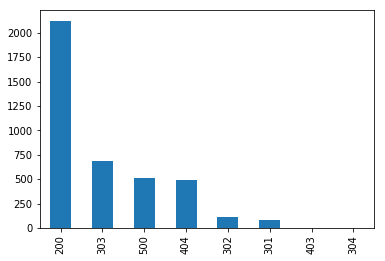

In [22]:
df['urlRef'].value_counts()[:20].plot(kind='bar')

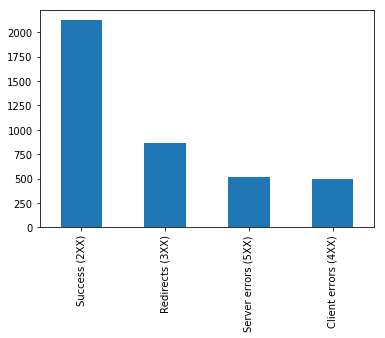

In [23]:
df['httpCodeClass'].value_counts()[:20].plot(kind='bar')

##  MODEL BUILDING

## Clustering Analysis
<p>Using Kmeans Clustering for analysis</p>
<p>Elbow Method to find the Optimal number of Clusters,With k-means, it can be challenging finding the optimum number of clusters so we will apply the elbow method to help us determine the number of clusters to use</P>


In [24]:
## dropping unneccessary columns
df = df.drop(['Domain','userAgent','httpProto','url','Method'],axis = 1)
df.head(2)

,IP,Date,timeTaken,urlRef,header,httpCodeClass,SEBotClass
0,192.168.4.163,NaT,3279,200,"3279 ""-"" ""w3af.org""""",Success (2XX),Else
1,192.168.4.163,NaT,3361,200,"3361 ""-"" ""w3af.org""""",Success (2XX),Else


In [30]:
df = df.drop(['IP','header','httpCodeClass','SEBotClass'],axis = 1)
df.head(2)

,Date,timeTaken,urlRef
0,-9223372036854775808,3279,200
1,-9223372036854775808,3361,200


In [31]:
# converting these columns to numeric because i want it to appear in my corr matrix,i'll convert it back after
df['Date'] = pd.to_numeric(df['Date'], errors='ignore')

In [32]:
df['timeTaken'] = pd.to_numeric(df['timeTaken'], errors='ignore')

In [33]:
df['urlRef'] = pd.to_numeric(df['urlRef'], errors='ignore')

In [34]:
df.head(5)

,Date,timeTaken,urlRef
0,-9223372036854775808,3279,200
1,-9223372036854775808,3361,200
2,-9223372036854775808,3279,200
3,-9223372036854775808,3279,200
4,-9223372036854775808,3279,200


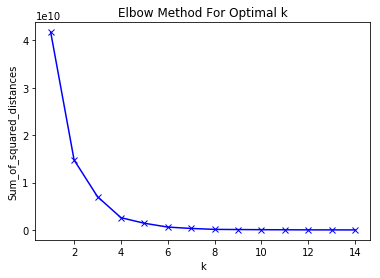

In [35]:
# elbow method
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

<p> Taking The value of k=4 </p>

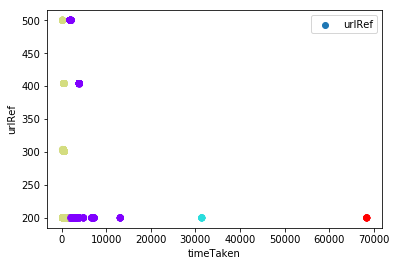

In [36]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=4, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(df)

# clusering result
clusters_4 = df.copy()
clusters_4['clusters_pred'] = kmeans.fit_predict(df)

# plotting
plt.scatter(clusters_4['timeTaken'],clusters_4['urlRef'],c = clusters_4['clusters_pred'],cmap='rainbow')
plt.xlabel('timeTaken')
plt.ylabel('urlRef')
plt.legend()
plt.show()

In [37]:
## checking the accurrency of the kmeans model
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['urlRef'],kmeans.labels_))
print(classification_report(df['urlRef'],kmeans.labels_))

[[   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [ 646    7 1464    6    0    0    0    0    0    0    0    0]
 [   0    0   77    0    0    0    0    0    0    0    0    0]
 [   0    0  108    0    0    0    0    0    0    0    0    0]
 [   0    0  681    0    0    0    0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0    0    0    0    0]
 [ 307    0  183    0    0    0    0    0    0    0    0    0]
 [ 501    0   12    0    0    0    0    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00   

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda2\lib\sit